In [204]:
# Import important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Statistical Visualization
import seaborn as sns

# Classification or Regression imports
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

#Model Selection Specific

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import OneHotEncoder

%matplotlib inline

In [175]:
df = pd.read_csv('../data/matches.csv')

In [176]:
df2 = pd.read_csv('../data/deliveries.csv')

In [177]:
df.rename(columns={"id":"match_id"},inplace=True)

In [180]:
df.head()

match_id  season       city        date                        team1  \
0         1    2017  Hyderabad  2017-04-05          Sunrisers Hyderabad   
1         2    2017       Pune  2017-04-06               Mumbai Indians   
2         3    2017     Rajkot  2017-04-07                Gujarat Lions   
3         4    2017     Indore  2017-04-08       Rising Pune Supergiant   
4         5    2017  Bangalore  2017-04-08  Royal Challengers Bangalore   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3              Kings XI Punjab              Kings XI Punjab         field   
4             Delhi Daredevils  Royal Challengers Bangalore           bat   

   result  dl_applied                       winner  win_by_runs  \
0  normal           0          Sunrisers Hyderabad           35   
1  normal           0       Rising Pune Supergiant            0   
2  normal           0        Kolkata Knight Riders            0   
3  normal           0              Kings XI Punjab            0   
4  normal           0  Royal Challengers Bangalore           15   

   win_by_wickets player_of_match                                      venue  \
0               0    Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal   
1               7       SPD Smith    Maharashtra Cricket Association Stadium   
2              10         CA Lynn     Saurashtra Cricket Association Stadium   
3               6      GJ Maxwell                     Holkar Cricket Stadium   
4               0       KM Jadhav                      M Chinnaswamy Stadium   

          umpire1        umpire2  umpire3  
0     AY Dandekar       NJ Llong      NaN  
1  A Nand Kishore         S Ravi      NaN  
2     Nitin Menon      CK Nandan      NaN  
3    AK Chaudhary  C Shamshuddin      NaN  
4             NaN            NaN      NaN

In [181]:
df2.head()

match_id  inning         batting_team                 bowling_team  over  \
0         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
1         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
2         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
3         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
4         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   

   ball    batsman non_striker    bowler  is_super_over  wide_runs  bye_runs  \
0     1  DA Warner    S Dhawan  TS Mills              0          0         0   
1     2  DA Warner    S Dhawan  TS Mills              0          0         0   
2     3  DA Warner    S Dhawan  TS Mills              0          0         0   
3     4  DA Warner    S Dhawan  TS Mills              0          0         0   
4     5  DA Warner    S Dhawan  TS Mills              0          2         0   

   legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
0            0            0             0             0           0   
1            0            0             0             0           0   
2            0            0             0             4           0   
3            0            0             0             0           0   
4            0            0             0             0           2   

   total_runs player_dismissed dismissal_kind fielder  
0           0              NaN            NaN     NaN  
1           0              NaN            NaN     NaN  
2           4              NaN            NaN     NaN  
3           0              NaN            NaN     NaN  
4           2              NaN            NaN     NaN

In [182]:
df_merged = pd.merge(df, df2, on=['match_id']) 

In [183]:
df_merged.head()

match_id  season       city        date                team1  \
0         1    2017  Hyderabad  2017-04-05  Sunrisers Hyderabad   
1         1    2017  Hyderabad  2017-04-05  Sunrisers Hyderabad   
2         1    2017  Hyderabad  2017-04-05  Sunrisers Hyderabad   
3         1    2017  Hyderabad  2017-04-05  Sunrisers Hyderabad   
4         1    2017  Hyderabad  2017-04-05  Sunrisers Hyderabad   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
2  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
3  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
4  Royal Challengers Bangalore  Royal Challengers Bangalore         field   

   result  dl_applied               winner  win_by_runs  win_by_wickets  \
0  normal           0  Sunrisers Hyderabad           35               0   
1  normal           0  Sunrisers Hyderabad           35               0   
2  normal           0  Sunrisers Hyderabad           35               0   
3  normal           0  Sunrisers Hyderabad           35               0   
4  normal           0  Sunrisers Hyderabad           35               0   

  player_of_match                                      venue      umpire1  \
0    Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal  AY Dandekar   
1    Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal  AY Dandekar   
2    Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal  AY Dandekar   
3    Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal  AY Dandekar   
4    Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal  AY Dandekar   

    umpire2  umpire3  inning         batting_team  \
0  NJ Llong      NaN       1  Sunrisers Hyderabad   
1  NJ Llong      NaN       1  Sunrisers Hyderabad   
2  NJ Llong      NaN       1  Sunrisers Hyderabad   
3  NJ Llong      NaN       1  Sunrisers Hyderabad   
4  NJ Llong      NaN       1  Sunrisers Hyderabad   

                  bowling_team  over  ball    batsman non_striker    bowler  \
0  Royal Challengers Bangalore     1     1  DA Warner    S Dhawan  TS Mills   
1  Royal Challengers Bangalore     1     2  DA Warner    S Dhawan  TS Mills   
2  Royal Challengers Bangalore     1     3  DA Warner    S Dhawan  TS Mills   
3  Royal Challengers Bangalore     1     4  DA Warner    S Dhawan  TS Mills   
4  Royal Challengers Bangalore     1     5  DA Warner    S Dhawan  TS Mills   

   is_super_over  wide_runs  bye_runs  legbye_runs  noball_runs  penalty_runs  \
0              0          0         0            0            0             0   
1              0          0         0            0            0             0   
2              0          0         0            0            0             0   
3              0          0         0            0            0             0   
4              0          2         0            0            0             0   

   batsman_runs  extra_runs  total_runs player_dismissed dismissal_kind  \
0             0           0           0              NaN            NaN   
1             0           0           0              NaN            NaN   
2             4           0           4              NaN            NaN   
3             0           0           0              NaN            NaN   
4             0           2           2              NaN            NaN   

  fielder  
0     NaN  
1     NaN  
2     NaN  
3     NaN  
4     NaN

In [184]:
df_merged.shape

(150460, 38)

In [137]:
pd.set_option('display.max_columns', None)

In [84]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150460 entries, 0 to 150459
Data columns (total 38 columns):
match_id            150460 non-null int64
season              150460 non-null int64
city                148760 non-null object
date                150460 non-null object
team1               150460 non-null object
team2               150460 non-null object
toss_winner         150460 non-null object
toss_decision       150460 non-null object
result              150460 non-null object
dl_applied          150460 non-null int64
winner              150139 non-null object
win_by_runs         150460 non-null int64
win_by_wickets      150460 non-null int64
player_of_match     150139 non-null object
venue               150460 non-null object
umpire1             150212 non-null object
umpire2             150212 non-null object
umpire3             0 non-null float64
inning              150460 non-null int64
batting_team        150460 non-null object
bowling_team        150460 non-null obj

In [185]:
df_merged = df_merged.drop(['umpire3', 'city','player_dismissed','dismissal_kind','fielder'],axis=1)

In [186]:
df_merged.head()

match_id  season        date                team1  \
0         1    2017  2017-04-05  Sunrisers Hyderabad   
1         1    2017  2017-04-05  Sunrisers Hyderabad   
2         1    2017  2017-04-05  Sunrisers Hyderabad   
3         1    2017  2017-04-05  Sunrisers Hyderabad   
4         1    2017  2017-04-05  Sunrisers Hyderabad   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
2  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
3  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
4  Royal Challengers Bangalore  Royal Challengers Bangalore         field   

   result  dl_applied               winner  win_by_runs  win_by_wickets  \
0  normal           0  Sunrisers Hyderabad           35               0   
1  normal           0  Sunrisers Hyderabad           35               0   
2  normal           0  Sunrisers Hyderabad           35               0   
3  normal           0  Sunrisers Hyderabad           35               0   
4  normal           0  Sunrisers Hyderabad           35               0   

  player_of_match                                      venue      umpire1  \
0    Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal  AY Dandekar   
1    Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal  AY Dandekar   
2    Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal  AY Dandekar   
3    Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal  AY Dandekar   
4    Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal  AY Dandekar   

    umpire2  inning         batting_team                 bowling_team  over  \
0  NJ Llong       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
1  NJ Llong       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
2  NJ Llong       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
3  NJ Llong       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
4  NJ Llong       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   

   ball    batsman non_striker    bowler  is_super_over  wide_runs  bye_runs  \
0     1  DA Warner    S Dhawan  TS Mills              0          0         0   
1     2  DA Warner    S Dhawan  TS Mills              0          0         0   
2     3  DA Warner    S Dhawan  TS Mills              0          0         0   
3     4  DA Warner    S Dhawan  TS Mills              0          0         0   
4     5  DA Warner    S Dhawan  TS Mills              0          2         0   

   legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
0            0            0             0             0           0   
1            0            0             0             0           0   
2            0            0             0             4           0   
3            0            0             0             0           0   
4            0            0             0             0           2   

   total_runs  
0           0  
1           0  
2           4  
3           0  
4           2

In [187]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150460 entries, 0 to 150459
Data columns (total 33 columns):
match_id           150460 non-null int64
season             150460 non-null int64
date               150460 non-null object
team1              150460 non-null object
team2              150460 non-null object
toss_winner        150460 non-null object
toss_decision      150460 non-null object
result             150460 non-null object
dl_applied         150460 non-null int64
winner             150139 non-null object
win_by_runs        150460 non-null int64
win_by_wickets     150460 non-null int64
player_of_match    150139 non-null object
venue              150460 non-null object
umpire1            150212 non-null object
umpire2            150212 non-null object
inning             150460 non-null int64
batting_team       150460 non-null object
bowling_team       150460 non-null object
over               150460 non-null int64
ball               150460 non-null int64
batsman        

In [188]:
df_merged['winner'].fillna('xyz',inplace=True)
df_merged['player_of_match'].fillna('xyz',inplace=True)
df_merged['umpire1'].fillna('xyz',inplace=True)
df_merged['umpire2'].fillna('xyz',inplace=True)

In [189]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150460 entries, 0 to 150459
Data columns (total 33 columns):
match_id           150460 non-null int64
season             150460 non-null int64
date               150460 non-null object
team1              150460 non-null object
team2              150460 non-null object
toss_winner        150460 non-null object
toss_decision      150460 non-null object
result             150460 non-null object
dl_applied         150460 non-null int64
winner             150460 non-null object
win_by_runs        150460 non-null int64
win_by_wickets     150460 non-null int64
player_of_match    150460 non-null object
venue              150460 non-null object
umpire1            150460 non-null object
umpire2            150460 non-null object
inning             150460 non-null int64
batting_team       150460 non-null object
bowling_team       150460 non-null object
over               150460 non-null int64
ball               150460 non-null int64
batsman        

In [190]:
le=LabelEncoder()
df_merged = df_merged.apply(le.fit_transform)

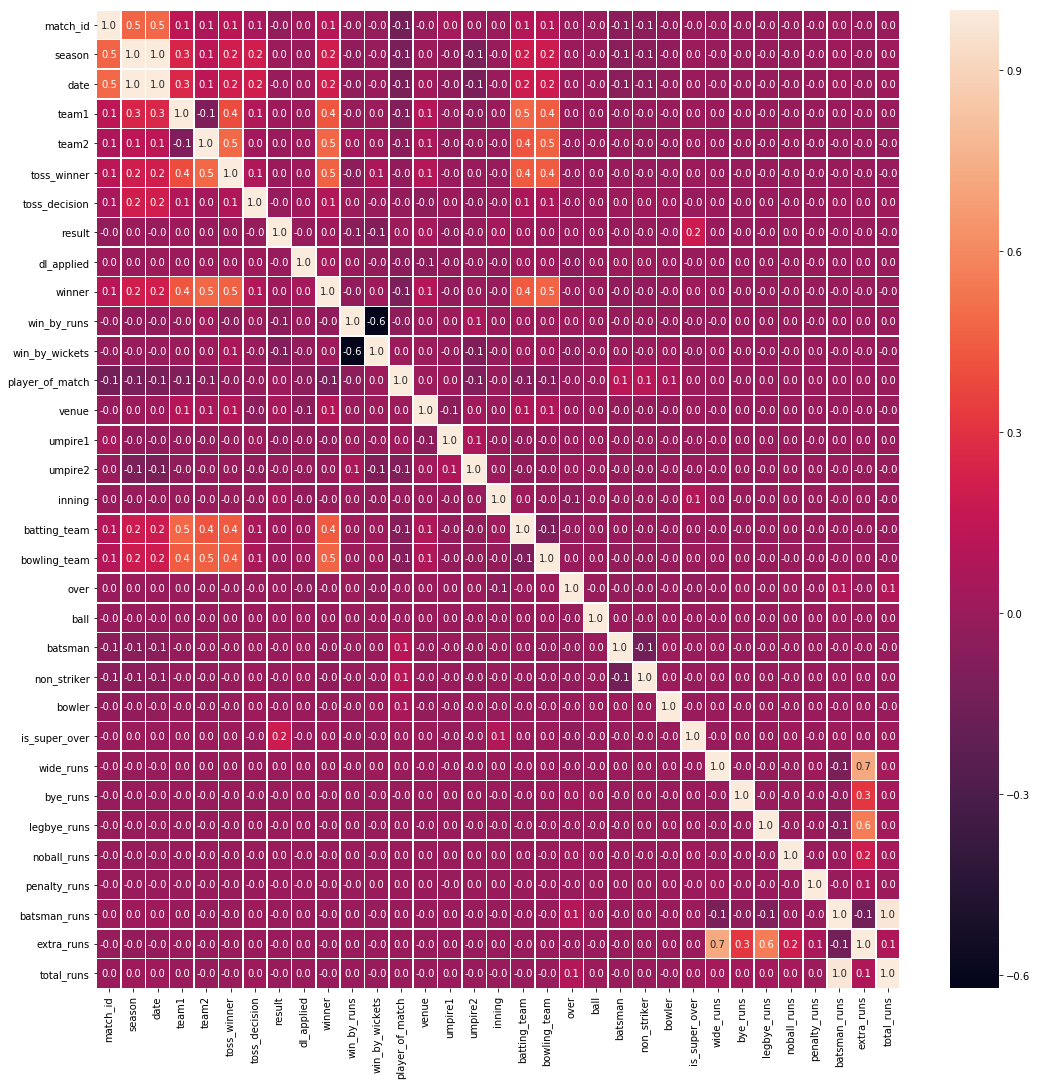

In [191]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df_merged.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax) 

In [192]:
df_merged = df_merged.drop(['over'],axis=1)
df_merged = df_merged.drop(['ball'],axis=1)
df_merged = df_merged.drop(['batting_team'],axis=1)
df_merged = df_merged.drop(['bowling_team'],axis=1)
df_merged = df_merged.drop(['batsman'],axis=1)
df_merged = df_merged.drop(['bowler'],axis=1)
df_merged = df_merged.drop(['is_super_over'],axis=1)
df_merged = df_merged.drop(['inning'],axis=1)

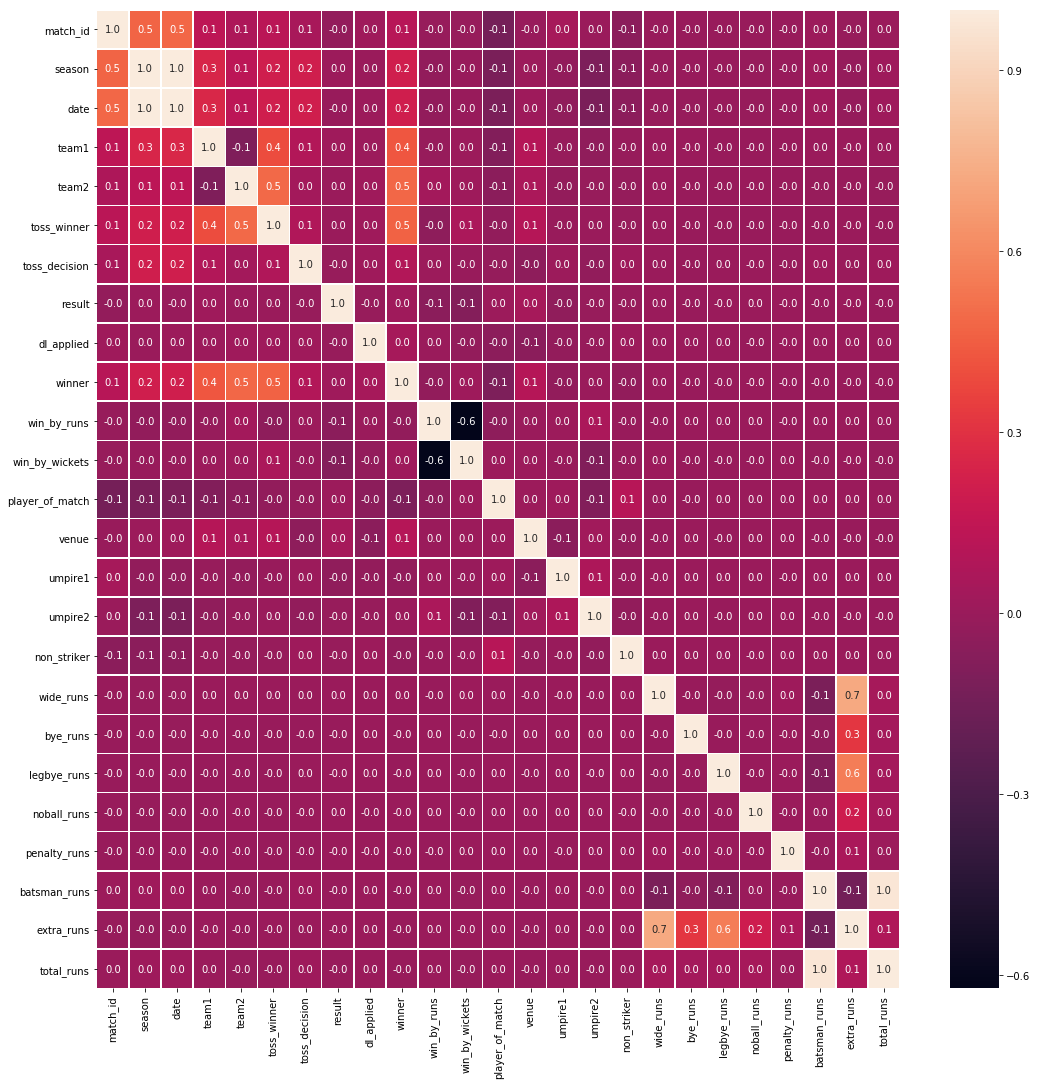

In [193]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df_merged.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax) 

In [194]:
df_merged = df_merged.drop(['result'],axis=1)
df_merged = df_merged.drop(['dl_applied'],axis=1)
df_merged = df_merged.drop(['umpire1'],axis=1)
df_merged = df_merged.drop(['umpire2'],axis=1)
df_merged = df_merged.drop(['venue'],axis=1)


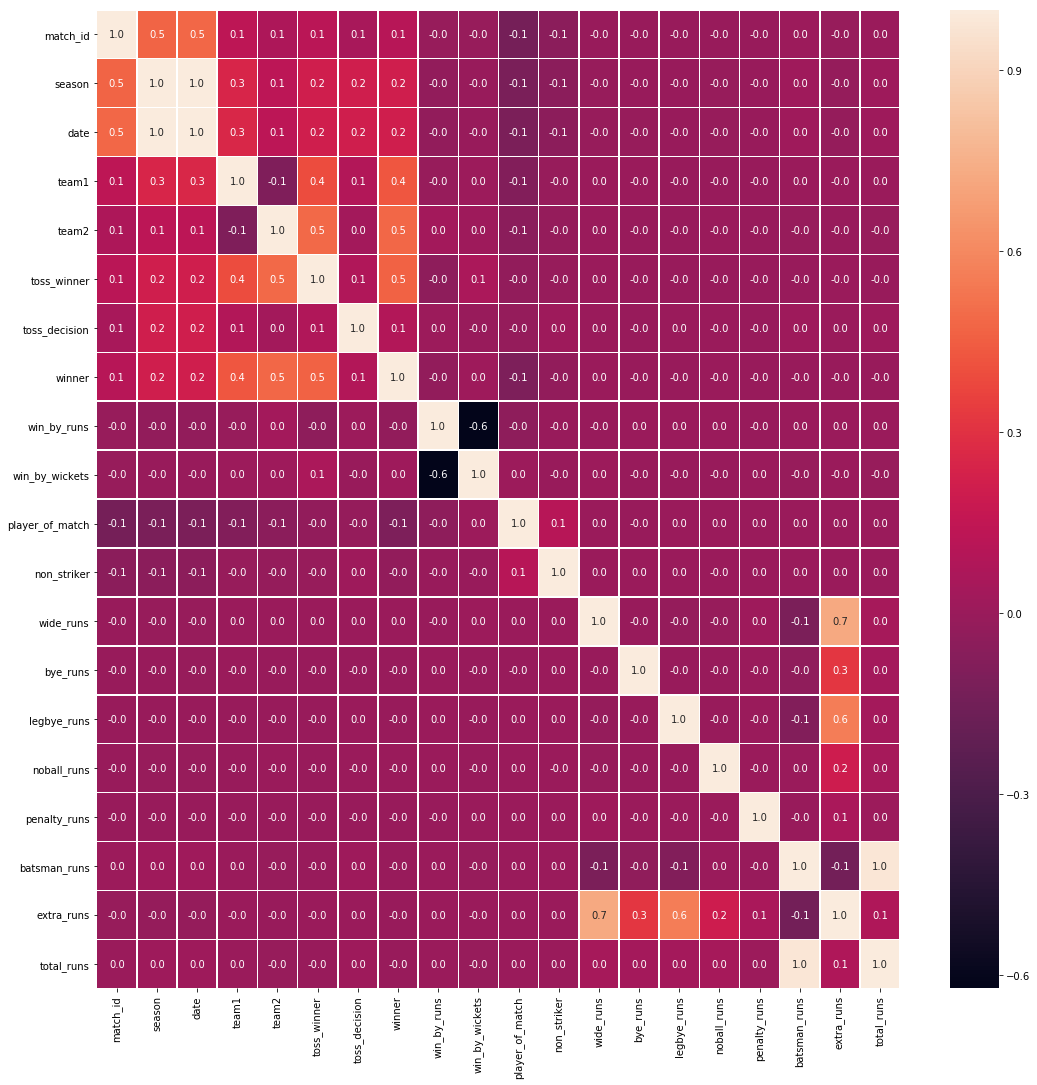

In [195]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df_merged.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax) 

In [106]:
df_merged.shape

(150460, 11)

In [117]:
print("Top 10 Team name who won toss most of times")
toss_winner_index = df['toss_winner'].value_counts().index
toss_win_count = df['toss_winner'].value_counts().tolist()
max_toss_winners = pd.DataFrame({'team_name':toss_winner_index, 'toss_win_count':toss_win_count})
max_toss_winners[:14]

Top 10 Team name who won toss most of times


team_name  toss_win_count
0                Mumbai Indians              85
1         Kolkata Knight Riders              78
2              Delhi Daredevils              72
3   Royal Challengers Bangalore              70
4               Kings XI Punjab              68
5           Chennai Super Kings              66
6              Rajasthan Royals              63
7               Deccan Chargers              43
8           Sunrisers Hyderabad              35
9                 Pune Warriors              20
10                Gujarat Lions              15
11         Kochi Tuskers Kerala               8
12      Rising Pune Supergiants               7
13       Rising Pune Supergiant               6

In [116]:
print("Top 10 Team who won more matches")
temp_res = df['winner'].value_counts()
most_winning_team = pd.DataFrame({'team_name':temp_res.index, 'winning_count':temp_res.tolist()})
most_winning_team[:14]

Top 10 Team who won more matches


team_name  winning_count
0                Mumbai Indians             92
1           Chennai Super Kings             79
2         Kolkata Knight Riders             77
3   Royal Challengers Bangalore             73
4               Kings XI Punjab             70
5              Rajasthan Royals             63
6              Delhi Daredevils             62
7           Sunrisers Hyderabad             42
8               Deccan Chargers             29
9                 Gujarat Lions             13
10                Pune Warriors             12
11       Rising Pune Supergiant             10
12         Kochi Tuskers Kerala              6
13      Rising Pune Supergiants              5